<a href="https://colab.research.google.com/github/ziyasarican/PythonMachineLearning/blob/main/BoyutIndirgeme/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Boyut İndirgeme ve PCA (Principel Component Analysis)
- Görselleştirme, gürültü filtreleme, öznetilek çıkarımı, sağlık verileri, borsa gibi konularda kullanılır.
- Boyut dönüştürmeye, değişkenler arası bağlantıları açığa çıkarmada kullanacağız.
---
- Amaç öyle bir yeni boyut elde edilsin ki veriler maksimum şekilde birden ayrılsın. Çünkü birçok nokta aynı x veya y değerine sahip ve ayrıştırmak zor olabilir.
- Diğer deyişle 12 değişkenli(sütunlu) bir veriyi analiz etmek yerine daha az değişkenli bir hale getirip tahmin etme işlemi yapılabilir mi

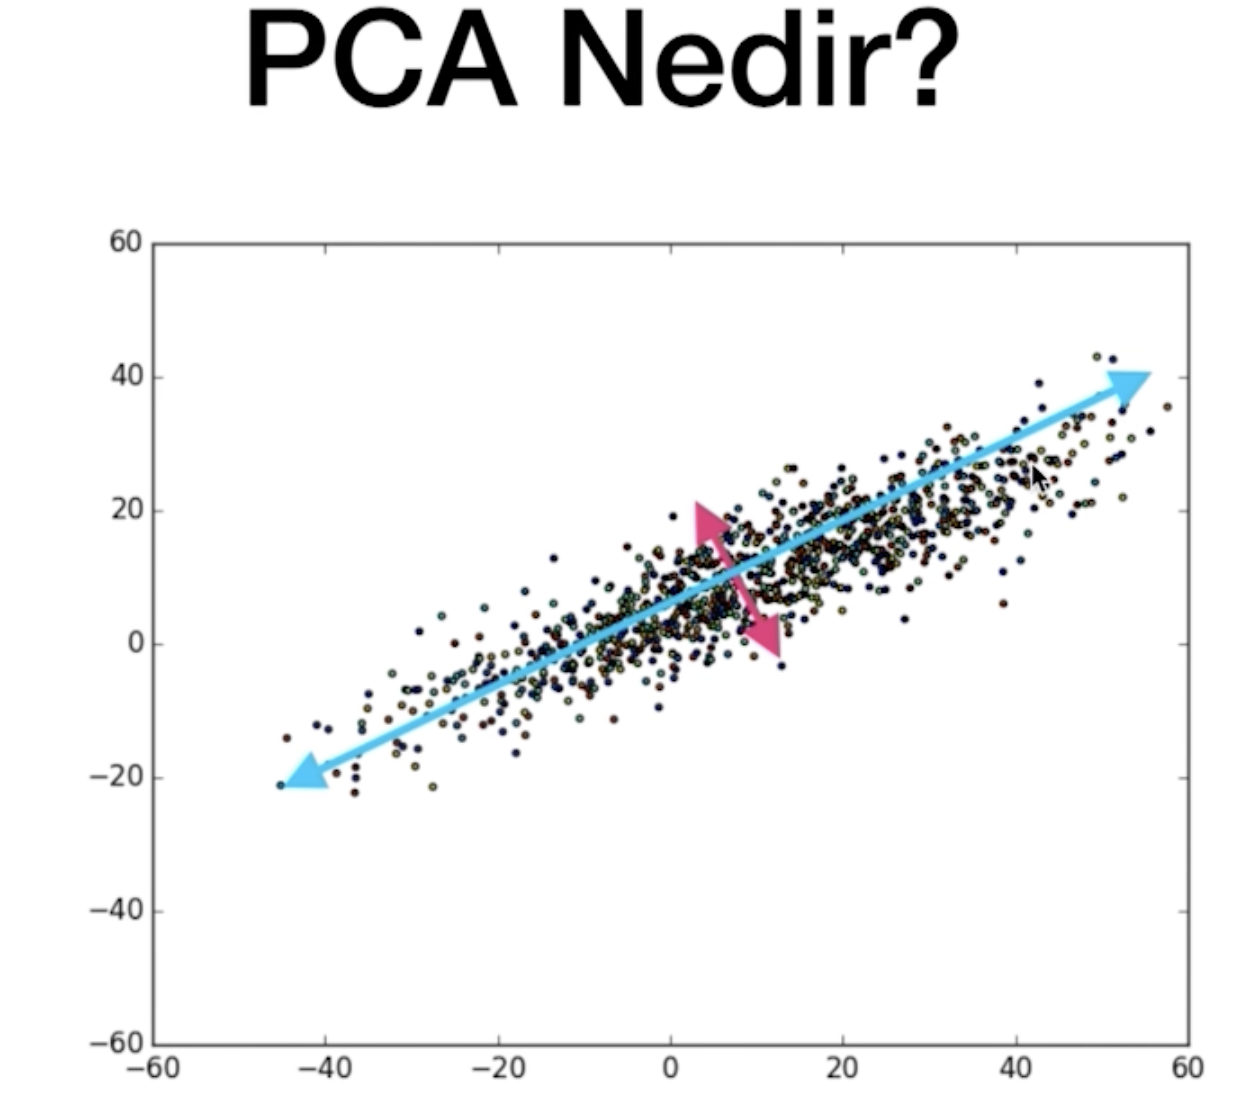

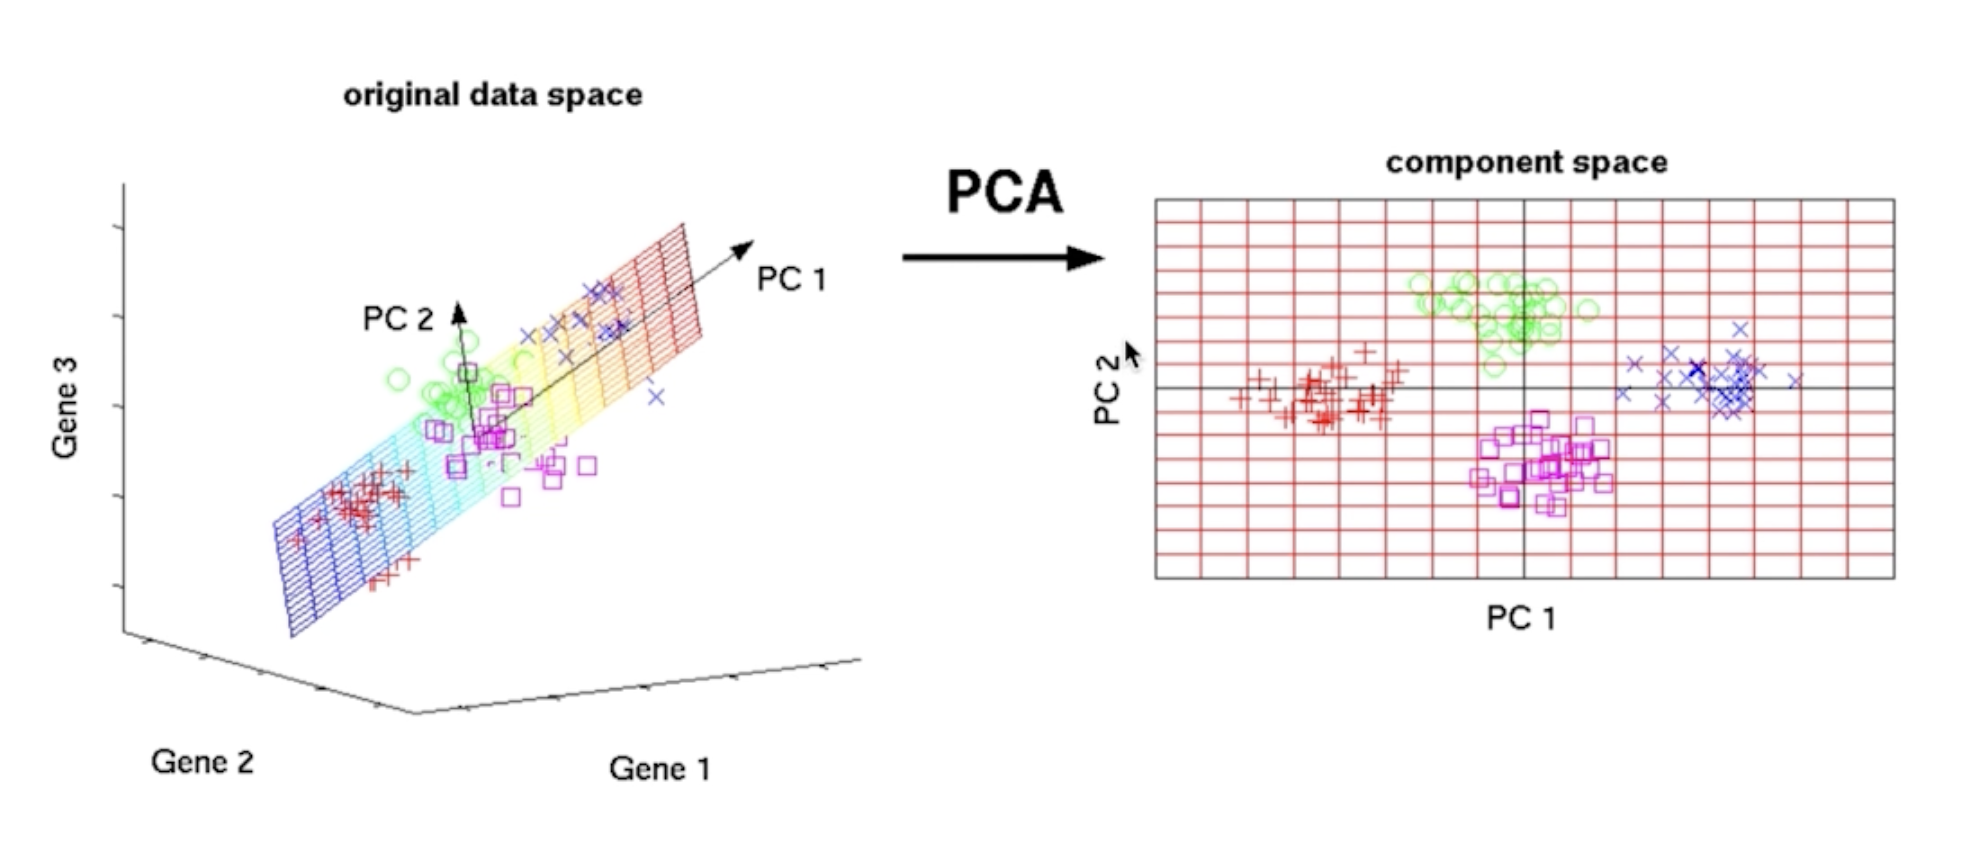

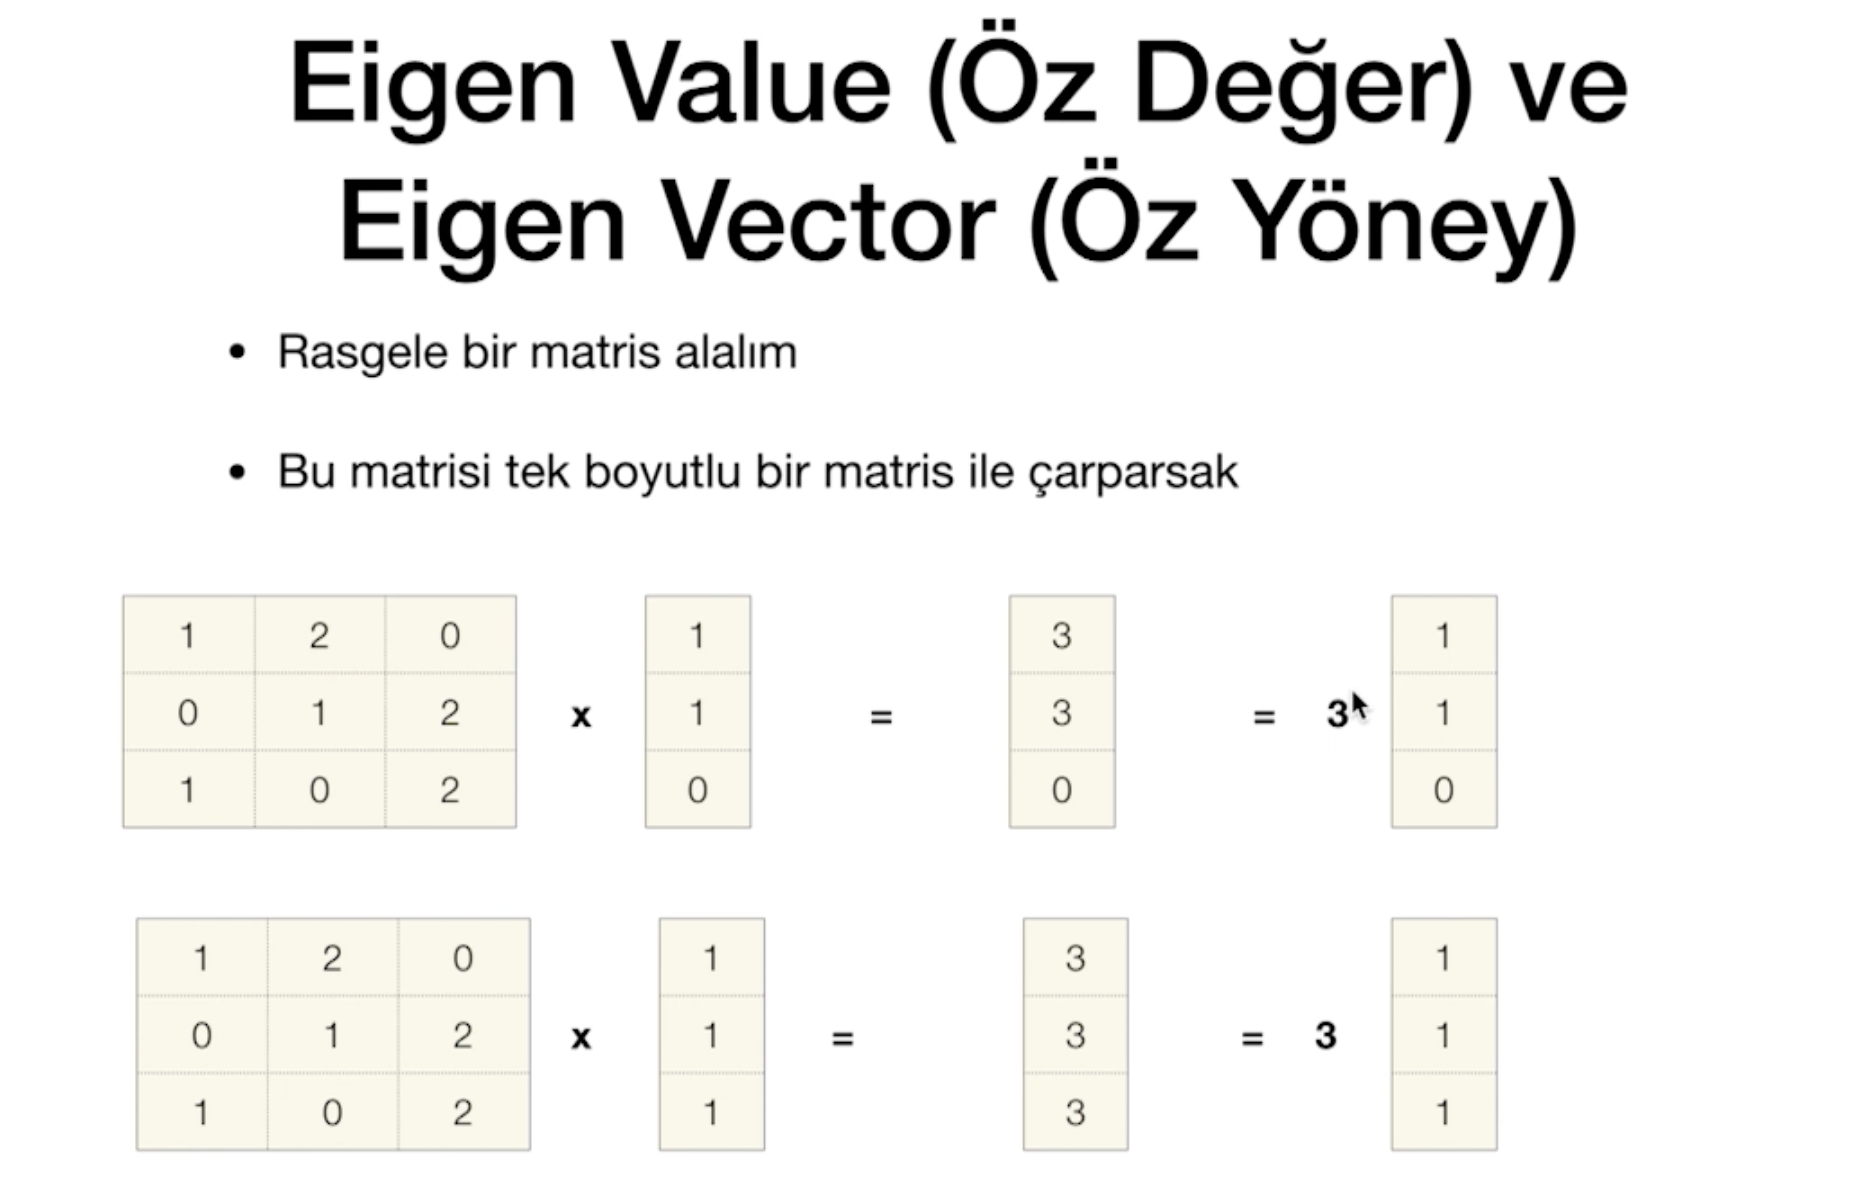

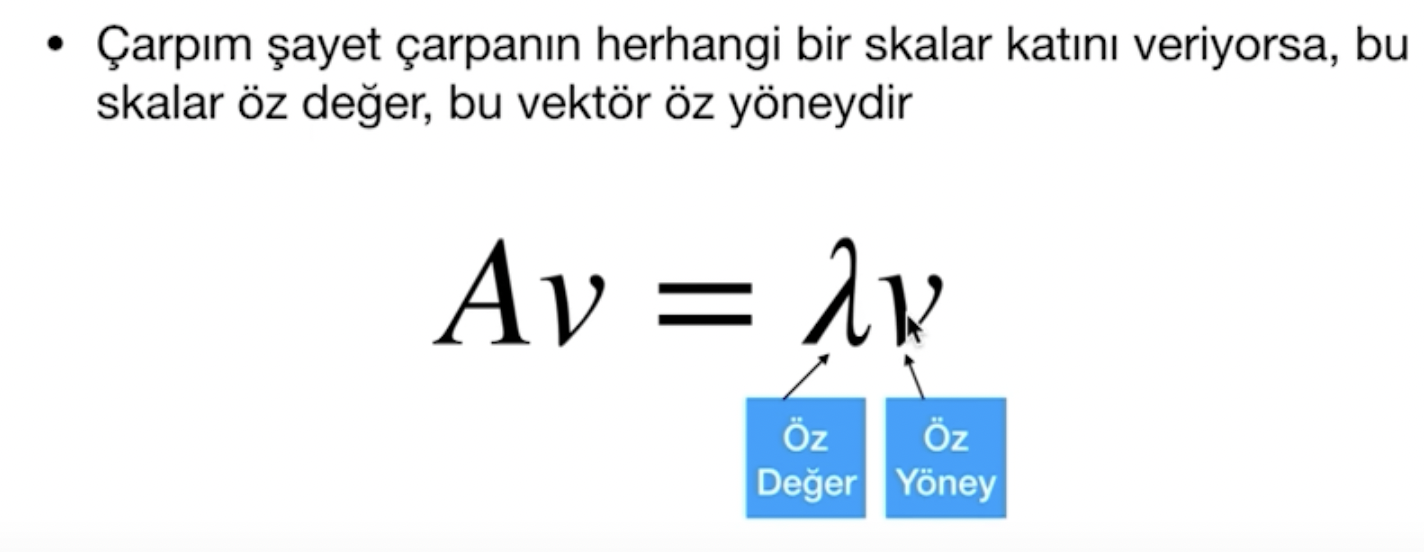

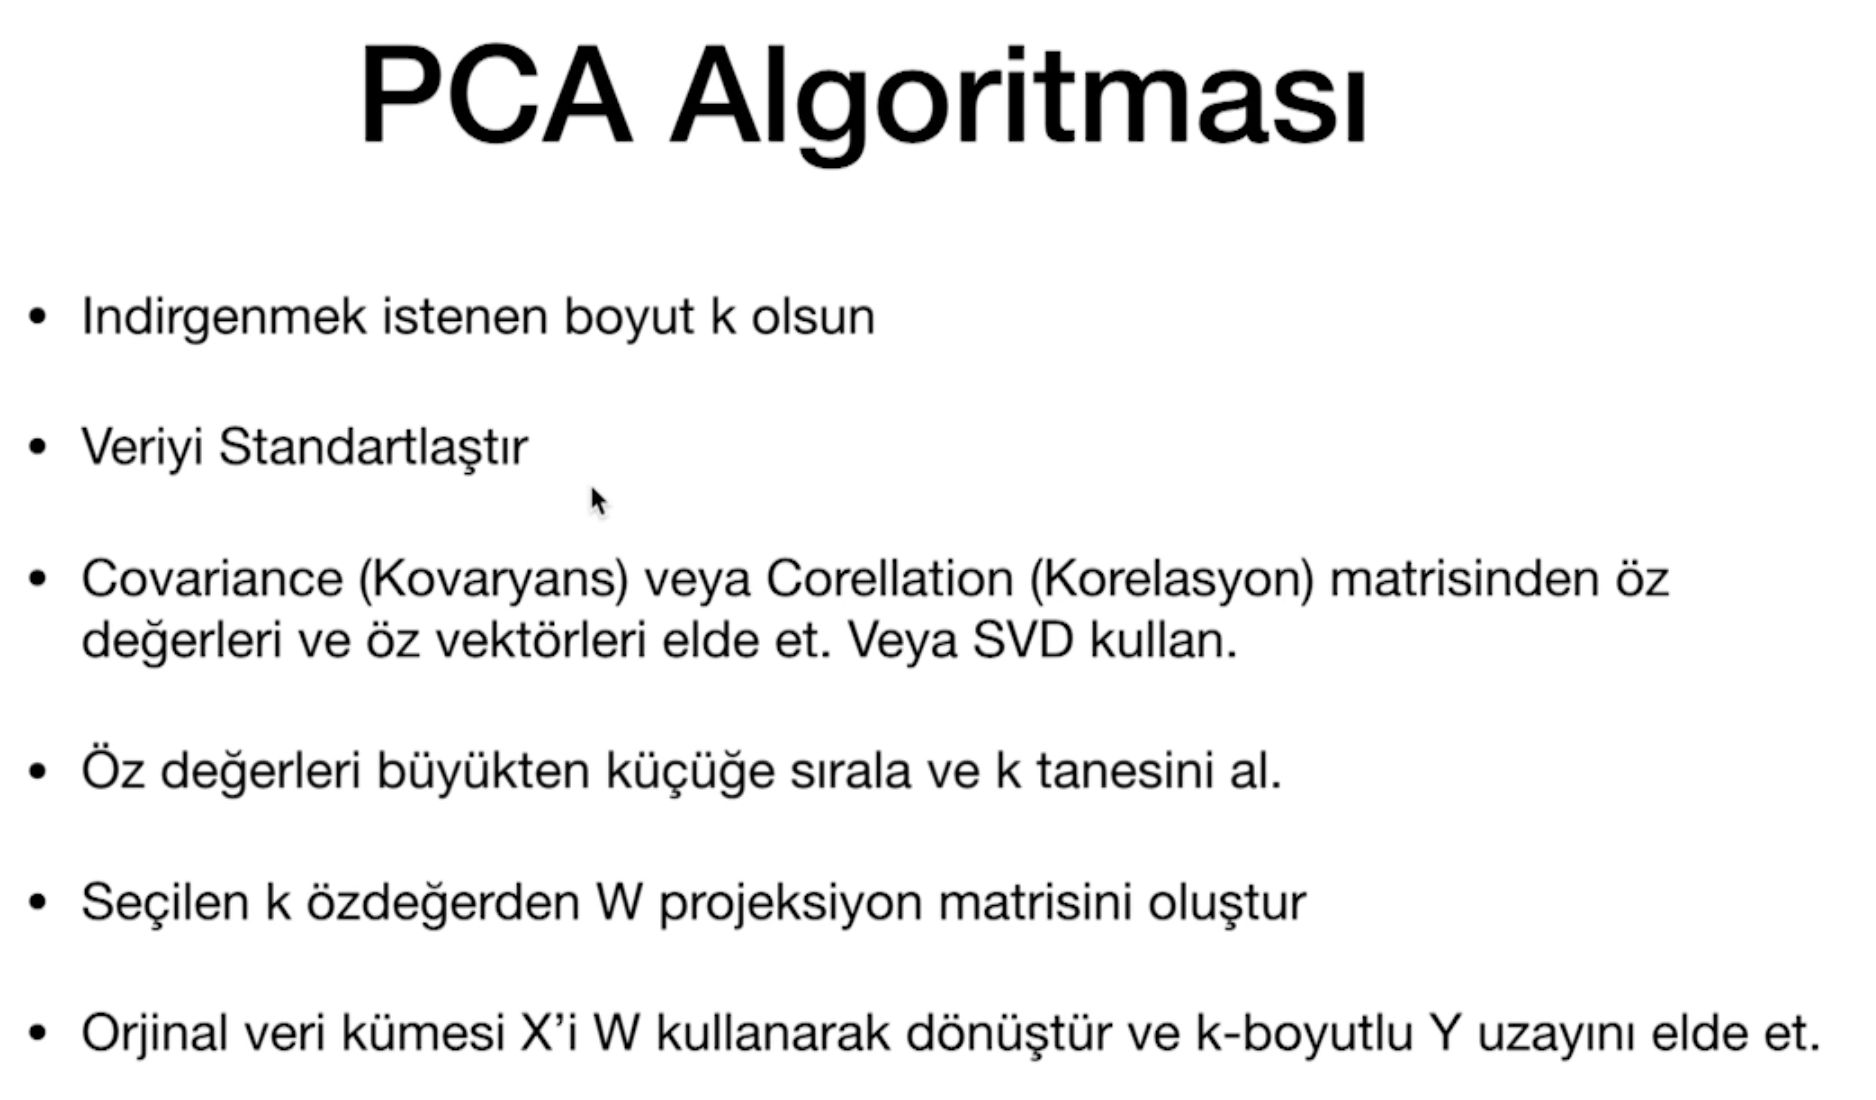

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [86]:
x = df.iloc[:,0:13].values
y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.30, random_state=0)
x_train

array([[1.371e+01, 1.860e+00, 2.360e+00, ..., 1.110e+00, 4.000e+00,
        1.035e+03],
       [1.222e+01, 1.290e+00, 1.940e+00, ..., 8.600e-01, 3.020e+00,
        3.120e+02],
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

In [87]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

x_train2 = pca.fit_transform(x_train)
x_test2 = pca.transform(x_test)
x_train2

array([[ 2.88227263e+02, -3.40565326e+00],
       [-4.34830640e+02, -1.69561898e+00],
       [ 8.85224495e+01,  1.86450475e+01],
       [ 8.32356682e+01,  7.09719817e-01],
       [-3.36959755e+02, -9.03011386e+00],
       [-1.76672108e+02,  8.56465876e+00],
       [-2.66888773e+02, -7.12224823e+00],
       [ 5.38085110e+02, -1.40789777e+01],
       [-2.31979140e+02, -1.16097706e+01],
       [-9.69686199e+01, -1.36858733e+01],
       [-3.18932016e+02, -1.04580612e+01],
       [-3.75002711e+02, -1.46273369e+01],
       [-7.16676368e+01,  6.95403126e+00],
       [-1.16834581e+02, -4.40372683e+00],
       [ 4.38200417e+02, -5.56170549e+00],
       [-2.26877123e+02, -8.91868033e+00],
       [ 1.91126346e+02,  5.90738000e+01],
       [-1.21268045e+02,  3.57225401e+01],
       [-6.67031819e+01,  3.85364197e+00],
       [ 7.63221822e+02, -6.37028570e+00],
       [-6.68540038e+01, -5.10530805e+00],
       [ 2.38721656e+02,  3.55578143e+01],
       [-2.76931959e+02, -9.97691493e+00],
       [-1.

In [88]:
# pca ile dönüştürdükten sonra logreg modeli ile öğrenme 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [91]:
y_pred = classifier.predict(x_test)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[17,  2,  0],
       [ 0, 21,  1],
       [ 0,  0, 13]])